In [4]:
%matplotlib ipympl 
# if you want to see the image and move it around
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d.art3d import Line3DCollection


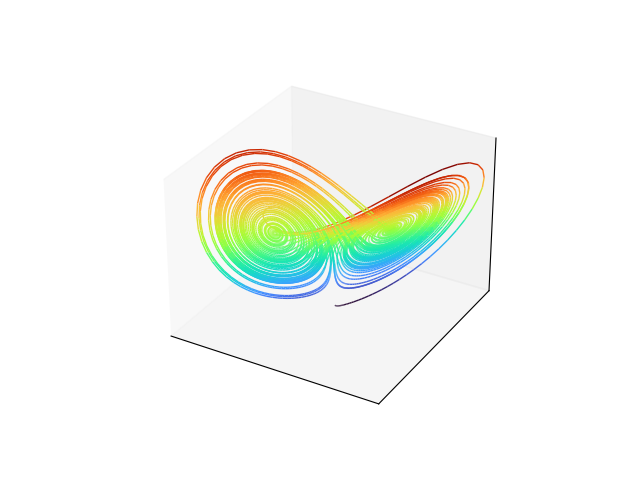

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def lorenz_still(sigma, rho, beta, x0, y0, z0, dt, num_steps, marker_size=1):
    
    x = np.zeros(num_steps)
    y = np.zeros(num_steps)
    z = np.zeros(num_steps)

    # initial conditions
    x[0], y[0], z[0] = (x0, y0, z0)

    for i in range(1, num_steps):
        x[i] = x[i-1] + (sigma*(y[i-1] - x[i-1])) * dt
        y[i] = y[i-1] + (rho*x[i-1] - y[i-1] - x[i-1]*z[i-1]) * dt
        z[i] = z[i-1] + (x[i-1]*y[i-1] - beta*z[i-1]) * dt

    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-20, 20)
    ax.set_ylim(-30, 30)
    ax.set_zlim(0, 50)

    # Apply gradient colors based on coordinates
    norm = plt.Normalize(z.min(), z.max())
    points = np.array([x, y, z]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    colors = plt.cm.viridis(norm(z))

    # Create a line collection with gradient colors
    lc = Line3DCollection(segments, cmap='turbo', norm=norm)
    lc.set_array(z)
    lc.set_linewidth(marker_size)

    # Add the line collection to the plot
    ax.add_collection3d(lc, zs=z, zdir='z')

    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()


def lorenz_animation(sigma, rho, beta, x0, y0, z0, dt, num_steps):
    
    x = np.zeros(num_steps)
    y = np.zeros(num_steps)
    z = np.zeros(num_steps)

    # initial conditions
    x[0], y[0], z[0] = (x0, y0, z0)

    for i in range(1, num_steps):
        x[i] = x[i-1] + (sigma*(y[i-1] - x[i-1])) * dt
        y[i] = y[i-1] + (rho*x[i-1] - y[i-1] - x[i-1]*z[i-1]) * dt
        z[i] = z[i-1] + (x[i-1]*y[i-1] - beta*z[i-1]) * dt

    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-20, 20)
    ax.set_ylim(-30, 30)
    ax.set_zlim(0, 50)

    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))

    # Plotting the initial point
    line, = ax.plot([], [], [], lw=2, color="#3471eb")

    # Initialization function
    def init():
        line.set_data([], [])
        line.set_3d_properties([])
        return line,

    # Animation function
    def animate(i):
        line.set_data(x[:i], y[:i])
        line.set_3d_properties(z[:i])
        return line,

    # Create animation
    animation = FuncAnimation(fig, animate, init_func=init, frames=num_steps//5, interval=1, blit=True)

    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    return animation




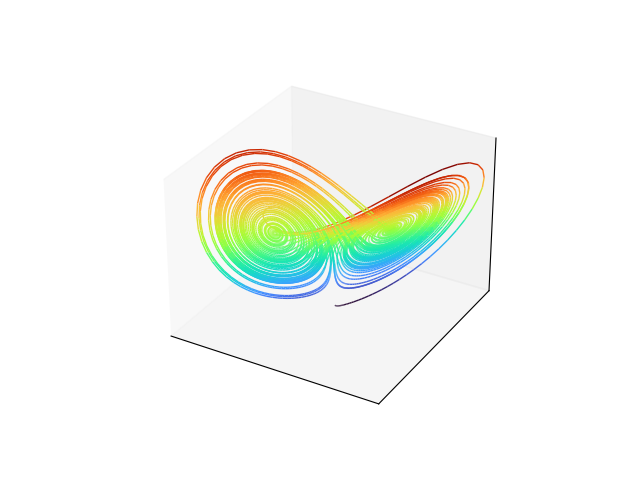

In [7]:
# Example usage
lorenz_still(sigma=10, rho=28, beta=2.667, x0=0, y0=1, z0=1.05, dt=0.01, num_steps=10000, marker_size=1)

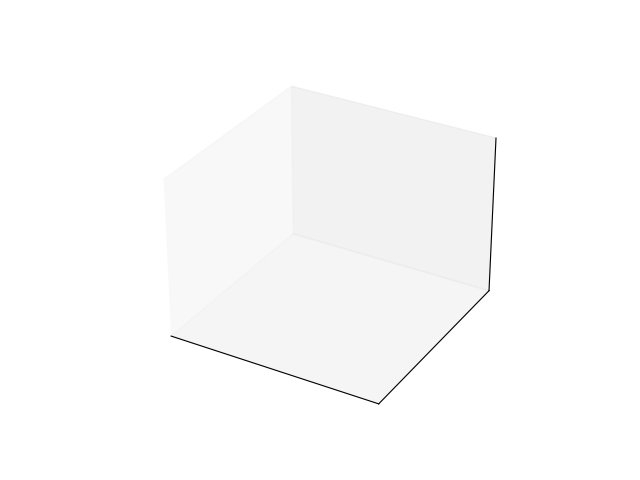

In [8]:
lorenz_animation(sigma=10, rho=28, beta=2.667, x0=0, y0=1, z0=1.05, dt=0.01, num_steps=10000)
